#q1)MNIST 에 대해서 SGD(), loss=‘sparse_categorical_entropy’, epochs=50 환경에서
Dropout(..) 비율을 0.25, 0.5, 0.75 등으로 변경하여 오버피팅을 확인해보자. 

In [1]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization

from tensorflow.keras.datasets import mnist

In [2]:
(x_train, t_train), (x_test, t_test) = mnist.load_data()   

print('x_train.shape = ', x_train.shape, ', t_train.shape = ', t_train.shape)
print('x_test.shape = ', x_test.shape, ', t_test.shape = ', t_test.shape)

x_train.shape =  (60000, 28, 28) , t_train.shape =  (60000,)
x_test.shape =  (10000, 28, 28) , t_test.shape =  (10000,)


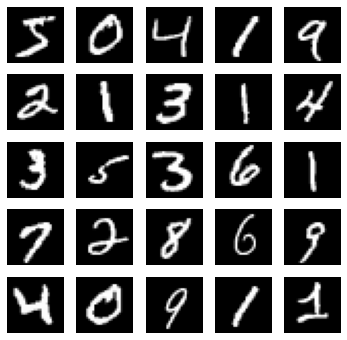

In [3]:
import matplotlib.pyplot as plt

# 25개의 이미지 출력
plt.figure(figsize=(6, 6))  # (6,1), (12,1), (12,6), (6,6) 등으로 다양하게 해본다

for index in range(25):    # 25 개 이미지 출력

    plt.subplot(5, 5, index + 1)  # 5행 5열 
    plt.imshow(x_train[index], cmap='gray')    # 1행 1열 -> 1행 2열 -> ...-> 1행 5열 -> 2행 1열 -> ...
    plt.axis('off')    

plt.show()

In [4]:
# x_train, x_test 값 범위를 0 ~ 1 사이로 정규화

x_train = x_train / 255.0
x_test = x_test / 255.0

Dropout(0.25)

In [5]:
model = Sequential()      # model 생성

model.add(Flatten(input_shape=(28, 28, 1)))  

model.add(Dense(100, activation='relu'))    

model.add(Dropout(0.25))  # Dropout() 추가

model.add(Dense(10, activation='softmax'))

In [6]:
from tensorflow.keras.optimizers import SGD

model.compile(optimizer=SGD(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [7]:
hist = model.fit(x_train, t_train, epochs=50, validation_split=0.2)

Epoch 1/50
1500/1500 [==============================] - 3s 1ms/step - loss: 0.8073 - accuracy: 0.7741 - val_loss: 0.3885 - val_accuracy: 0.8985
Epoch 2/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4371 - accuracy: 0.8757 - val_loss: 0.3112 - val_accuracy: 0.9161
Epoch 3/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3676 - accuracy: 0.8954 - val_loss: 0.2752 - val_accuracy: 0.9250
Epoch 4/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3279 - accuracy: 0.9083 - val_loss: 0.2485 - val_accuracy: 0.9317
Epoch 5/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2985 - accuracy: 0.9154 - val_loss: 0.2297 - val_accuracy: 0.9359
Epoch 6/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2778 - accuracy: 0.9222 - val_loss: 0.2170 - val_accuracy: 0.9388
Epoch 7/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2608 - accuracy: 0.9262 - val_loss: 0.2025 - val_accuracy:

In [8]:
# test data 이용하여 정확도 검증

model.evaluate(x_test, t_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0873 - accuracy: 0.9737


[0.08731087297201157, 0.9736999869346619]

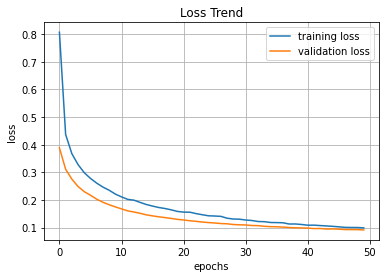

In [9]:
# 손실함수 그래프

plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='training loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')

plt.show()

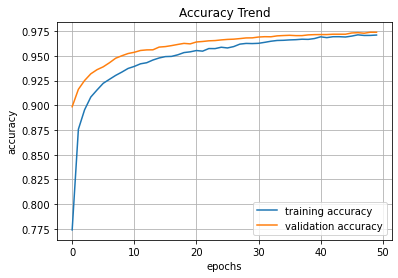

In [10]:
# 정확도 함수 그래프

plt.title('Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='training accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()



Dropout(0.5)

In [11]:
model = Sequential()      # model 생성

model.add(Flatten(input_shape=(28, 28, 1)))  

model.add(Dense(100, activation='relu'))    

model.add(Dropout(0.5))  # Dropout() 추가

model.add(Dense(10, activation='softmax'))

In [12]:
from tensorflow.keras.optimizers import SGD

model.compile(optimizer=SGD(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [13]:
hist = model.fit(x_train, t_train, epochs=50, validation_split=0.2)

Epoch 1/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.9564 - accuracy: 0.7106 - val_loss: 0.4182 - val_accuracy: 0.8940
Epoch 2/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5250 - accuracy: 0.8464 - val_loss: 0.3231 - val_accuracy: 0.9128
Epoch 3/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4360 - accuracy: 0.8725 - val_loss: 0.2787 - val_accuracy: 0.9233
Epoch 4/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3930 - accuracy: 0.8876 - val_loss: 0.2533 - val_accuracy: 0.9309
Epoch 5/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3604 - accuracy: 0.8960 - val_loss: 0.2359 - val_accuracy: 0.9347
Epoch 6/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3376 - accuracy: 0.9026 - val_loss: 0.2206 - val_accuracy: 0.9397
Epoch 7/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3193 - accuracy: 0.9091 - val_loss: 0.2087 - val_accuracy:

In [14]:
# test data 이용하여 정확도 검증

model.evaluate(x_test, t_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.1019 - accuracy: 0.9692


[0.10190818458795547, 0.9692000150680542]

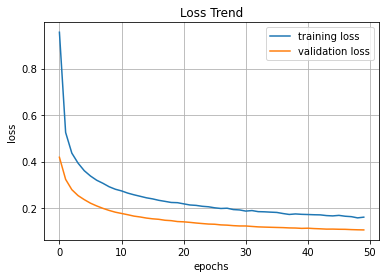

In [15]:
# 손실함수 그래프

plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='training loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')

plt.show()

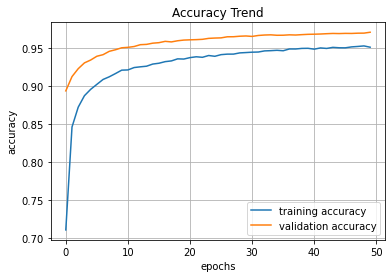

In [16]:
# 정확도 함수 그래프

plt.title('Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='training accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()

Dropout(0.75)

In [17]:
model = Sequential()      # model 생성

model.add(Flatten(input_shape=(28, 28, 1)))  

model.add(Dense(100, activation='relu'))    

model.add(Dropout(0.75))  # Dropout() 추가

model.add(Dense(10, activation='softmax'))

In [18]:
from tensorflow.keras.optimizers import SGD

model.compile(optimizer=SGD(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [19]:
hist = model.fit(x_train, t_train, epochs=50, validation_split=0.2)

Epoch 1/50
1500/1500 [==============================] - 4s 2ms/step - loss: 1.2383 - accuracy: 0.5927 - val_loss: 0.5143 - val_accuracy: 0.8846
Epoch 2/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.7661 - accuracy: 0.7600 - val_loss: 0.3803 - val_accuracy: 0.9065
Epoch 3/50
1500/1500 [==============================] - 2s 2ms/step - loss: 0.6525 - accuracy: 0.8001 - val_loss: 0.3300 - val_accuracy: 0.9147
Epoch 4/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5988 - accuracy: 0.8140 - val_loss: 0.2985 - val_accuracy: 0.9207
Epoch 5/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5589 - accuracy: 0.8295 - val_loss: 0.2793 - val_accuracy: 0.9240
Epoch 6/50
1500/1500 [==============================] - 2s 2ms/step - loss: 0.5277 - accuracy: 0.8379 - val_loss: 0.2642 - val_accuracy: 0.9277
Epoch 7/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5081 - accuracy: 0.8458 - val_loss: 0.2506 - val_accuracy:

In [20]:
# test data 이용하여 정확도 검증

model.evaluate(x_test, t_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1544 - accuracy: 0.9532


[0.15437641739845276, 0.9531999826431274]

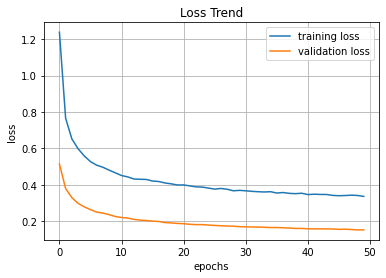

In [21]:
# 손실함수 그래프

plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='training loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')

plt.show()

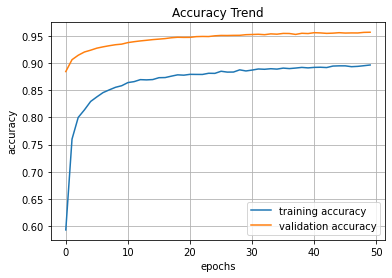

In [22]:
# 정확도 함수 그래프

plt.title('Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='training accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()